In [1]:
#GPU分配-按需分配
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config = config)

2022-11-10 15:53:10.187686: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#导入数据集
import time
import numpy as np
np.random.seed(10)
import tensorflow as tf
import matplotlib.pyplot as plt
cifar10 = tf.keras.datasets.cifar10

In [3]:
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [4]:
#查看训练集和测试集大小
print("train data:",'images:',x_img_train.shape," labels:",y_label_train.shape)
print("test data:",'images:',x_img_test.shape," labels:",y_label_test.shape)
y_label_test.shape

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test data: images: (10000, 32, 32, 3)  labels: (10000, 1)


(10000, 1)

In [5]:
#定义标签字典
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}
y_label_test.shape

(10000, 1)

In [6]:
#数据处理
x_img_train_normalize = x_img_train.astype('float32')/255.0
x_img_test_normalize = x_img_test.astype('float32')/255.0
y_label_train_onehot = tf.keras.utils.to_categorical(y_label_train)
y_label_test_onehot = tf.keras.utils.to_categorical(y_label_test)
y_label_test_onehot.shape

(10000, 10)

In [7]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
rescale=None,
rotation_range=15,
width_shift_range=0.1,
height_shift_range=0.1,
shear_range=0.1,
zoom_range=0.1,
horizontal_flip=True,
fill_mode='nearest'
)
datagen.fit(x_img_train)

In [8]:
#模型搭建-Keras:Sequential
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),input_shape=(32,32,3),padding='same',activation='relu',strides=(1,1)))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.Dropout(rate=0.4))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.Dropout(rate=0.4))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.Dropout(rate=0.4))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(rate=0.4))
model.add(tf.keras.layers.Dense(1024,activation='relu'))
#输出层
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [9]:
#模型训练
#超参数调整

model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

t1=time.time()
train_history=model.fit(x_img_train_normalize, y_label_train_onehot,
                        validation_split=0.2,
                        epochs=100, batch_size=128, verbose=1)    
t2=time.time()
CNNfit = float(t2-t1)
print("Time taken: {} seconds".format(CNNfit))

Epoch 1/100
313/313 [==============================] - 104s 331ms/step - loss: 1.7732 - accuracy: 0.3258 - val_loss: 1.7372 - val_accuracy: 0.4360
Epoch 2/100
313/313 [==============================] - 106s 340ms/step - loss: 1.3310 - accuracy: 0.5122 - val_loss: 1.4468 - val_accuracy: 0.5605
Epoch 3/100
313/313 [==============================] - 105s 336ms/step - loss: 1.1175 - accuracy: 0.5963 - val_loss: 1.3437 - val_accuracy: 0.5744
Epoch 4/100
313/313 [==============================] - 107s 341ms/step - loss: 0.9922 - accuracy: 0.6474 - val_loss: 1.2300 - val_accuracy: 0.6232
Epoch 5/100
313/313 [==============================] - 103s 330ms/step - loss: 0.9035 - accuracy: 0.6786 - val_loss: 1.0257 - val_accuracy: 0.7115
Epoch 6/100
313/313 [==============================] - 105s 337ms/step - loss: 0.8377 - accuracy: 0.7046 - val_loss: 1.0330 - val_accuracy: 0.6833
Epoch 7/100
313/313 [==============================] - 105s 335ms/step - loss: 0.7885 - accuracy: 0.7257 - val_loss: 0

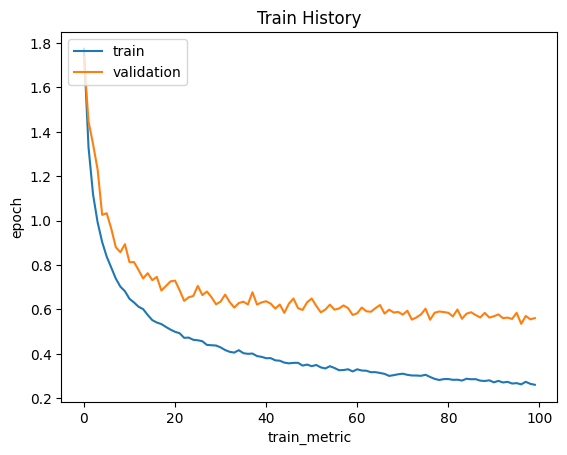

In [10]:
#可视化看看acc/loss和ecochs的关联
def vth(train_history,train_m,validation_m):
    plt.plot(train_history.history[train_m])
    plt.plot(train_history.history[validation_m])
    plt.title('Train History')
    plt.xlabel('train_metric')
    plt.ylabel('epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()
vth(train_history,'loss','val_loss')

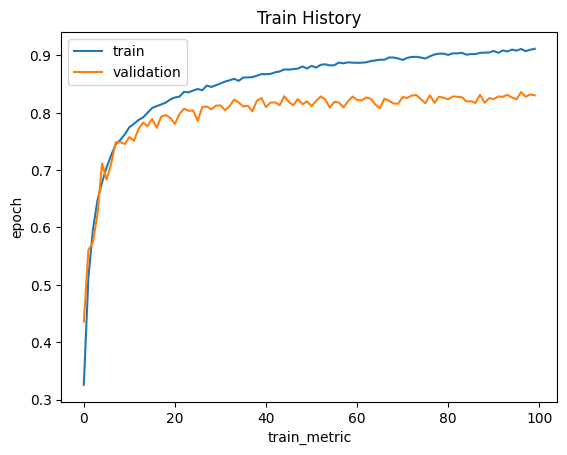

In [11]:
vth(train_history,'accuracy','val_accuracy')

In [12]:
scores = model.evaluate(x_img_test_normalize,y_label_test_onehot,verbose=0)
scores[1]

0.8220999836921692

In [14]:
model.save('model-1.h5')